In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (8, 6)

In [2]:
height = [155,160,165,172,177,180,185]
weight = [43,55,62,64, 67,74,90]

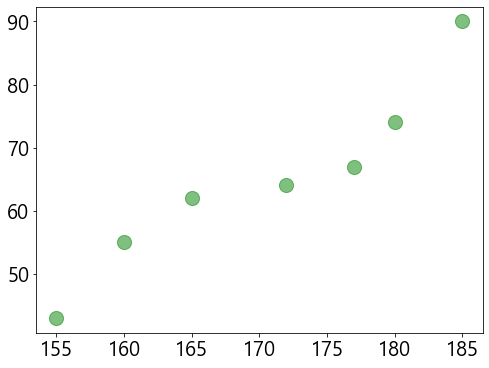

In [10]:
plt.scatter(height, weight, s=200, alpha=0.5, c='g') # alpha는 투명도 조절
plt.show()

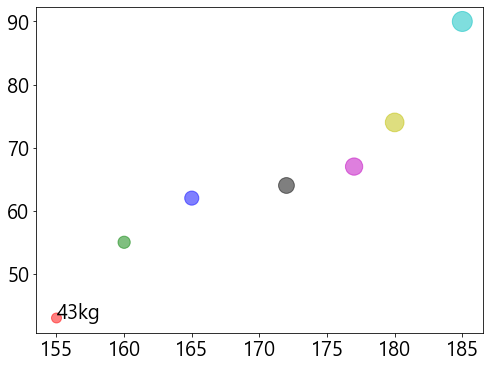

In [13]:
# 점의 크기 / 점의 색상을 리스트로 따로 지정해 줘도 ok

plt.scatter( height, weight,
            s=[100,150,200,250,300,350,400], 
            c=['r','g','b','k','m','y','c'],
            alpha=0.5)
plt.text(155, 43, '43kg')
plt.show()

# 키 , 몸무게 문제

<pre>
표준체중(kg)=(신장(cm)-100)×0.85
비만도(%)=현재체중/표준체중×100

비만도가
90이하:저체중, (y,100)
90∼110:정상,  (b ,150)
110∼120:과체중, (c, 200)
120 이상:비만    (r ,300)
그래프각점에 비만도결과값(저체중, 정상,과체중, 비만)글자를
표시하고 원의 크기는  각 결과 값에 다른 크기로
그리시요.
</pre>

In [49]:
height = [155,160,165,172,177,180,185]
weight = [43,55,62,64, 67,74,90]

a = [] 
b = []

for n1, n2 in zip(height, weight):
    n3 = (n1-100)*0.85
    n4 = n2/n3*100
    a.append(n3)
    b.append(n4)

DF = pd.DataFrame(a ,b)
DF = DF.reset_index()
DF.columns = ['표준체중', '비만도']
DF

,표준체중,비만도
0,91.978610,46.75
1,107.843137,51.00
2,112.217195,55.25
3,104.575163,61.20
4,102.368220,65.45
5,108.823529,68.00
6,124.567474,72.25


In [50]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   표준체중    7 non-null      float64
 1   비만도     7 non-null      float64
dtypes: float64(2)
memory usage: 240.0 bytes


In [51]:
def fn(v):
    if v >= 120.0:
        return '비만'
    elif v > 110.0:
        return '과체중'
    elif v > 90.0:
        return '정상'
    else:
        return '저체중'

In [47]:
DF['비만도 결과'] = DF['비만도'].apply(fn)
DF

,표준체중,비만도,비만도 결과
0,91.978610,46.75,저체중
1,107.843137,51.00,저체중
2,112.217195,55.25,저체중
3,104.575163,61.20,저체중
4,102.368220,65.45,저체중
5,108.823529,68.00,저체중
6,124.567474,72.25,저체중


## 강사님 풀이

In [60]:
# 차트 그리기
colorList=[]
sizeList=[]
textList=[]
def obesity( h, w):
    stdW = (h-100)*0.85
    fat = (w/stdW)*100
    color =''
    size=0
    text = ''
    if fat <=90:
        color = 'y'
        size = 100
        text = '저체중'
    elif fat<110:
        color = 'b'
        size= 150
        text = '정상'
    elif fat<120:
        color = 'c'
        size= 200
        text = '과체중'
    else:
        color = 'r'
        size= 300
        text = '비만'
    colorList.append(color)
    sizeList.append(size)
    textList.append(text)

In [61]:
# 함수에 넣어서 리스트 만들어 주기

for h, w in zip( height, weight):
    obesity( h, w )

In [62]:
colorList

['b', 'b', 'c', 'b', 'b', 'b', 'r']

In [63]:
sizeList

[150, 150, 200, 150, 150, 150, 300]

In [64]:
textList

['정상', '정상', '과체중', '정상', '정상', '정상', '비만']

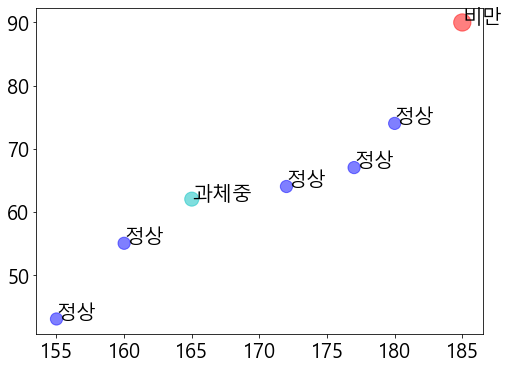

In [65]:
plt.scatter( height, weight,s=sizeList, 
            c=colorList, alpha=0.5)
for a,b,c in zip( height, weight,textList):
    plt.text( a,b,c)
plt.show()